# Regression comparison 
Set up enviroment


In [139]:
import numpy as np
import os
import pandas as pd
import matplotlib as mpl
from scipy.sparse import issparse
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.linear_model import LinearRegression, RANSACRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn import metrics



In [ ]:
# Make the plots bigger
plt.rcParams['figure.figsize'] = 10, 10

# Make plots show up!
%matplotlib inline

# Upload data

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving weights_1.csv to weights_1.csv
Saving weights_2.csv to weights_2.csv
Saving weights_3.csv to weights_3.csv
Saving weights_4.csv to weights_4.csv
Saving weights_5.csv to weights_5.csv
Saving weights_6.csv to weights_6.csv
Saving weights_7.csv to weights_7.csv
Saving weights_8.csv to weights_8.csv


# Preprocessing

In [ ]:
df1 = pd.read_csv('weights_1.csv', index_col=False, header=None, skiprows=0)
df2 = pd.read_csv('weights_2.csv', index_col=False, header=None, skiprows=0)
df3 = pd.read_csv('weights_3.csv', index_col=False, header=None, skiprows=0)
df4 = pd.read_csv('weights_4.csv', index_col=False, header=None, skiprows=0)
df5 = pd.read_csv('weights_5.csv', index_col=False, header=None, skiprows=0)
df6 = pd.read_csv('weights_6.csv', index_col=False, header=None, skiprows=0)
df7 = pd.read_csv('weights_7.csv', index_col=False, header=None, skiprows=0)
df8 = pd.read_csv('weights_8.csv', index_col=False, header=None, skiprows=0)
df = df1.append(df2)
df = df.append(df3)
df = df.append(df4)
df = df.append(df5)
df = df.append(df6)
df = df.append(df7)
df = df.append(df8)
df


0        1        2        3   ...       74       75       76       77
0     1.18142  0.69519 -0.70602  0.23769  ...  1.18869 -0.42926 -0.17390  0.49252
1     1.18330  0.69477 -0.70911  0.23753  ...  0.97277 -0.42052 -0.21470  0.48622
2     1.17929  0.69804 -0.64310  0.23922  ...  0.80141 -0.43445 -0.19833  0.48980
3     1.18024  0.67090 -0.58501  0.23992  ...  0.99911 -0.43433 -0.16801  0.48883
4     1.18800  0.66688 -0.60417  0.23007  ...  1.02037 -0.43865 -0.24660  0.49273
...       ...      ...      ...      ...  ...      ...      ...      ...      ...
9595  3.15143  3.94691  2.93198 -3.73295  ...  6.11513  1.02284 -0.41702  0.21463
9596  2.72829  3.90771  2.95480 -3.86926  ...  6.20485  0.95410 -1.35997  0.09543
9597  2.75731  3.84132  2.99787 -3.90293  ...  6.19578  1.07488 -1.01932 -0.01658
9598  3.85407  4.01382  3.04798 -3.90497  ...  6.06432  0.97641 -1.45400  0.02941
9599  2.59072  3.86257  3.07074 -3.83148  ...  6.04225  1.01392 -0.50029  0.01430

[10272 rows x 78 columns]

In [ ]:
ef1 = pd.read_csv('delay_1.csv', index_col=False, header=None, skiprows=0)
ef2 = pd.read_csv('delay_2.csv', index_col=False, header=None, skiprows=0)
ef3 = pd.read_csv('delay_3.csv', index_col=False, header=None, skiprows=0)
ef4 = pd.read_csv('delay_4.csv', index_col=False, header=None, skiprows=0)
ef5 = pd.read_csv('delay_5.csv', index_col=False, header=None, skiprows=0)
ef6 = pd.read_csv('delay_6.csv', index_col=False, header=None, skiprows=0)
ef7 = pd.read_csv('delay_7.csv', index_col=False, header=None, skiprows=0)
ef8 = pd.read_csv('delay_8.csv', index_col=False, header=None, skiprows=0)

ef = ef1.append(ef2)
ef = ef.append(ef3)
ef = ef.append(ef4)
ef = ef.append(ef5)
ef = ef.append(ef6)
ef = ef.append(ef7)
ef = ef.append(ef8)

ef





0        1        2        3   ...       74       75       76       77
0     6.76000  6.64000  6.52000  6.04000  ...  6.40000  6.28000  6.88000  6.28000
1     6.76000  6.88000  6.52000  6.04000  ...  6.16000  6.40000  6.88000  6.16000
2     6.76000  6.76000  6.52000  6.04000  ...  6.28000  6.04000  6.88000  6.28000
3     6.76000  6.76000  6.52000  6.04000  ...  6.28000  6.28000  6.88000  6.28000
4     6.76000  6.76000  6.64000  6.04000  ...  6.16000  6.52000  6.88000  6.28000
...       ...      ...      ...      ...  ...      ...      ...      ...      ...
9595  8.05963  8.41055  7.99771  7.95642  ...  8.03899  7.95642  8.01835  8.08028
9596  8.14220  5.95413  8.01835  7.95642  ...  8.01835  7.95642  8.01835  8.05963
9597  8.14220  5.78899  8.01835  7.97706  ...  8.03899  7.95642  7.99771  8.03899
9598  8.08028  5.87156  8.01835  7.97706  ...  8.05963  7.97706  8.01835  8.08028
9599  8.10092  5.85092  8.03899  7.99771  ...  8.03899  7.95642  7.93578  7.93578

[10272 rows x 78 columns]

In [ ]:
X = pd.concat([df, ef], axis=1)
X


0        1        2        3   ...       74       75       76       77
0     1.18142  0.69519 -0.70602  0.23769  ...  6.40000  6.28000  6.88000  6.28000
1     1.18330  0.69477 -0.70911  0.23753  ...  6.16000  6.40000  6.88000  6.16000
2     1.17929  0.69804 -0.64310  0.23922  ...  6.28000  6.04000  6.88000  6.28000
3     1.18024  0.67090 -0.58501  0.23992  ...  6.28000  6.28000  6.88000  6.28000
4     1.18800  0.66688 -0.60417  0.23007  ...  6.16000  6.52000  6.88000  6.28000
...       ...      ...      ...      ...  ...      ...      ...      ...      ...
9595  3.15143  3.94691  2.93198 -3.73295  ...  8.03899  7.95642  8.01835  8.08028
9596  2.72829  3.90771  2.95480 -3.86926  ...  8.01835  7.95642  8.01835  8.05963
9597  2.75731  3.84132  2.99787 -3.90293  ...  8.03899  7.95642  7.99771  8.03899
9598  3.85407  4.01382  3.04798 -3.90497  ...  8.05963  7.97706  8.01835  8.08028
9599  2.59072  3.86257  3.07074 -3.83148  ...  8.03899  7.95642  7.93578  7.93578

[10272 rows x 156 columns]

In [ ]:
y1 = pd.read_csv('fitness_1.csv', index_col=False, header=None, skiprows=0)
y2 = pd.read_csv('fitness_2.csv', index_col=False, header=None, skiprows=0)
y3 = pd.read_csv('fitness_3.csv', index_col=False, header=None, skiprows=0)
y4 = pd.read_csv('fitness_4.csv', index_col=False, header=None, skiprows=0)
y5 = pd.read_csv('fitness_5.csv', index_col=False, header=None, skiprows=0)
y6= pd.read_csv('fitness_6.csv', index_col=False, header=None, skiprows=0)
y7 = pd.read_csv('fitness_7.csv', index_col=False, header=None, skiprows=0)
y8 = pd.read_csv('fitness_8.csv', index_col=False, header=None, skiprows=0)

y = y1.append(y2)
y = y.append(y3)
y = y.append(y4)
y = y.append(y5)
y = y.append(y6)
y = y.append(y7)
y = y.append(y8)
y


0
0      689.65517
1      624.41752
2      465.98322
3      521.90121
4    -1733.45760
...          ...
9595 -4209.27864
9596     1.33554
9597   -15.69256
9598  -759.92054
9599     1.33554

[10272 rows x 1 columns]

# Regression
Models set up

In [133]:
# Splitting the dataset into the Training set and Test set

X_train, X_test_row, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)


In [134]:
# Feature Scaling

sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test_row)

Fitting models

In [135]:
# Fitting Linear Regression to the dataset
lin_reg = LinearRegression()
model1 = lin_reg.fit(X_train, y_train)



In [154]:
# Fitting Polynomial Regression to the dataset
poly_reg = PolynomialFeatures(degree = 2)
X_poly = poly_reg.fit_transform(X_train)
poly_reg.fit(X_poly, y_train)
lin_reg_2 = LinearRegression()
model2 = lin_reg_2.fit(X_poly, y_train)

# Predict

In [174]:
y1_pred = lin_reg.predict(X_test)
fig, ax = plt.subplots(figsize=(16, 20))
c = -abs(y_test - y1_pred)
ax.scatter(y_test,y1_pred, s=15, c=c,cmap=plt.cm.coolwarm, zorder=10)
lims_plus = [
    np.min([ax.get_xlim(), ax.get_ylim()])+100,  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()])+100,  # max of both axes
]
lims_minus = [
    np.min([ax.get_xlim(), ax.get_ylim()])-100,  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()])-100,  # max of both axes
]
lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
]

# now plot both limits against eachother
ax.plot(lims_plus, lims, 'k-', alpha=0.75, zorder=0, label = 'Predication interval (upper bound)')
ax.plot(lims_minus, lims, 'k-', alpha=0.75, zorder=0, label = 'Predication interval (lower bound)')
plt.axvline(x=-1000, color='b', linestyle='--', label='GT Fitness=1000')
plt.axvline(x=200, color='b', linestyle='--', label='GT Fitness=200')
plt.axhline(y=-1000, color='g', linestyle='--', label='Model Fitness=1000')
plt.axhline(y=200, color='g', linestyle='--', label='Model Fitness=200')
ax.plot(lims_plus, lims, 'k-', alpha=0.75, zorder=0)
ax.plot(lims_minus, lims, 'k-', alpha=0.75, zorder=0)
ax.legend(fontsize=15)
ax.set_title('Linear Regression (Train size=8220, Test size=2052)', size=15)
ax.set_aspect('equal')
ax.set_xlabel('Ground Truth', size=15)
ax.set_ylabel('Predication', size=15)

ax.set_xlim(lims)
ax.set_ylim(lims)
plt.savefig('LR_pred.png', dpi=300)
files.download('LR_pred.png')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

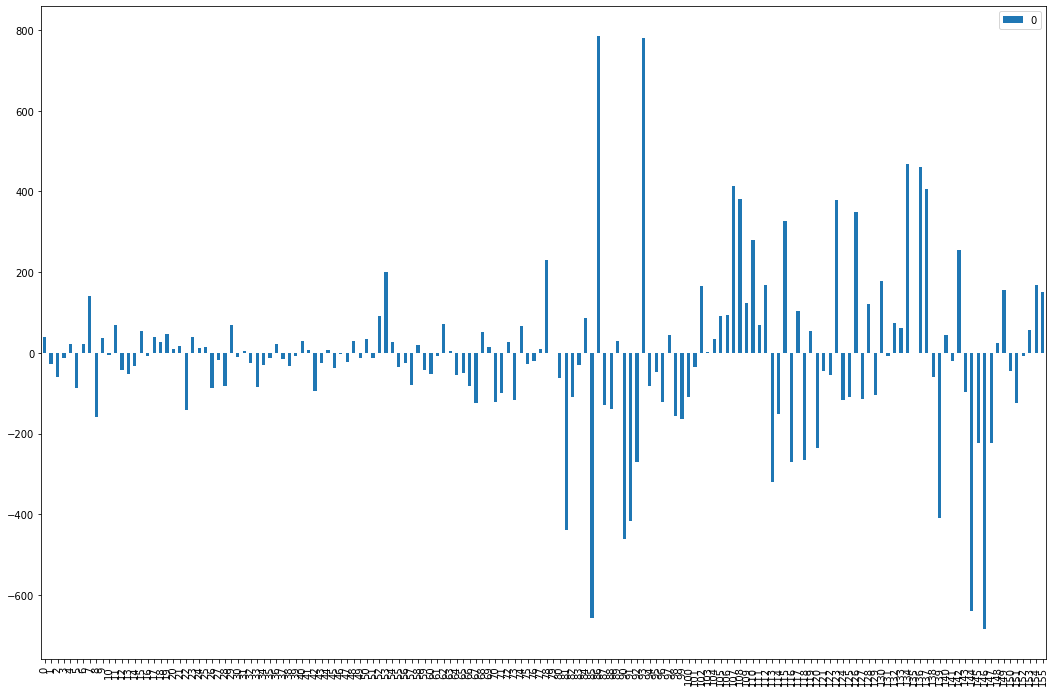

In [190]:
coeff = lin_reg.coef_
coeff_for = pd.DataFrame(np.transpose(coeff))
sz = len(coeff)
linspace = np.linspace(lin_reg.coef_.min(),lin_reg.coef_.max())
coeff_for.plot.bar(figsize = [18, 12])

In [155]:
X_poly_test = poly_reg.fit_transform(X_test)

y2_pred = lin_reg_2.predict(X_poly_test)

In [171]:
fig2, ax2 = plt.subplots(figsize=(16, 20))
c2 = -abs(y_test - y2_pred)
ax2.scatter(y_test,y2_pred, c=c2,cmap=plt.cm.coolwarm, zorder=10)
lims_plus = [
    np.min([ax2.get_xlim(), ax2.get_ylim()])+100,  # min of both axes
    np.max([ax2.get_xlim(), ax2.get_ylim()])+100,  # max of both axes
]
lims_minus = [
    np.min([ax2.get_xlim(), ax2.get_ylim()])-100,  # min of both axes
    np.max([ax2.get_xlim(), ax2.get_ylim()])-100,  # max of both axes
]
lims = [
    np.min([ax2.get_xlim(), ax2.get_ylim()]),  # min of both axes
    np.max([ax2.get_xlim(), ax2.get_ylim()]),  # max of both axes
]

# now plot both limits against eachother
ax2.plot(lims_plus, lims, 'k-', alpha=0.75, zorder=0, label = 'Predication interval (upper bound)')
ax2.plot(lims_minus, lims, 'k-', alpha=0.75, zorder=0, label = 'Predication interval (lower bound)')
plt.axvline(x=-1000, color='b', linestyle='--', label='GT Fitness=1000')
plt.axvline(x=200, color='b', linestyle='--', label='GT Fitness=200')
plt.axhline(y=-1000, color='g', linestyle='--', label='Model Fitness=1000')
plt.axhline(y=200, color='g', linestyle='--', label='Model Fitness=200')
ax2.plot(lims_plus, lims, 'k-', alpha=0.75, zorder=0)
ax2.plot(lims_minus, lims, 'k-', alpha=0.75, zorder=0)
ax2.legend(fontsize=15)
ax2.set_title('Polynomial Regression (Train size=8220, Test size=2052)', size=15)
ax2.set_aspect('equal')
ax2.set_xlabel('Ground Truth', size=15)
ax2.set_ylabel('Predication', size=15)
ax2.set_xlim([-10000,10000])
ax2.set_ylim([-10000,10000])
plt.savefig('Poly_pred.png', dpi=300)
files.download('Poly_pred.png')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Scores
Before CV

In [137]:
lin_reg.score(X_test, y_test)

0.07244156862150686

In [ ]:
lin_reg_2.score(X_poly_test, y_test)

-40244.916388221594

5-Fold cross validation 

0.00023754976389478433

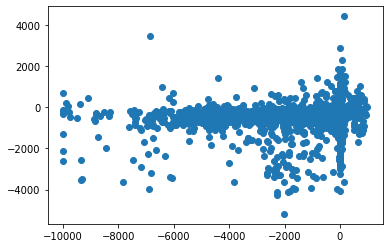

In [ ]:
# Perform 5-fold cross validation
scores = cross_val_score(lin_reg, X_train, y_train, cv=5)
predictions = cross_val_predict(model1, X_train, y_train, cv=5)
plt.scatter(y_train, predictions)
metrics.r2_score(y_train, predictions)

-3719.849083700121

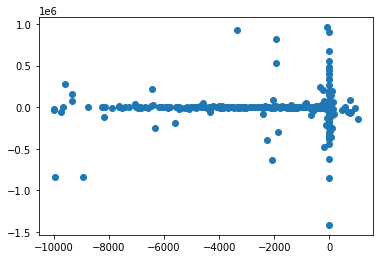

In [ ]:
# Perform 5-fold cross validation
scores2 = cross_val_score(lin_reg_2, X_poly_test, y_test, cv=5)
predictions2 = cross_val_predict(model2, X_poly_test, y_test, cv=5)
plt.scatter(y_test, predictions2)
metrics.r2_score(y_test, predictions2)

In [ ]:
y_test

0
4037   2.00331
1771   1.33554
9208   1.00165
8083   3.67273
7268   2.00331
...        ...
6870 -19.36529
4935   3.00496
922    2.00331
5360   1.33554
6263   1.33554

[2055 rows x 1 columns]

In [160]:
y_test.max()

0    1043.80242
dtype: float64

# RANSAC try
We see it colapse to constant finess estimation of 0

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

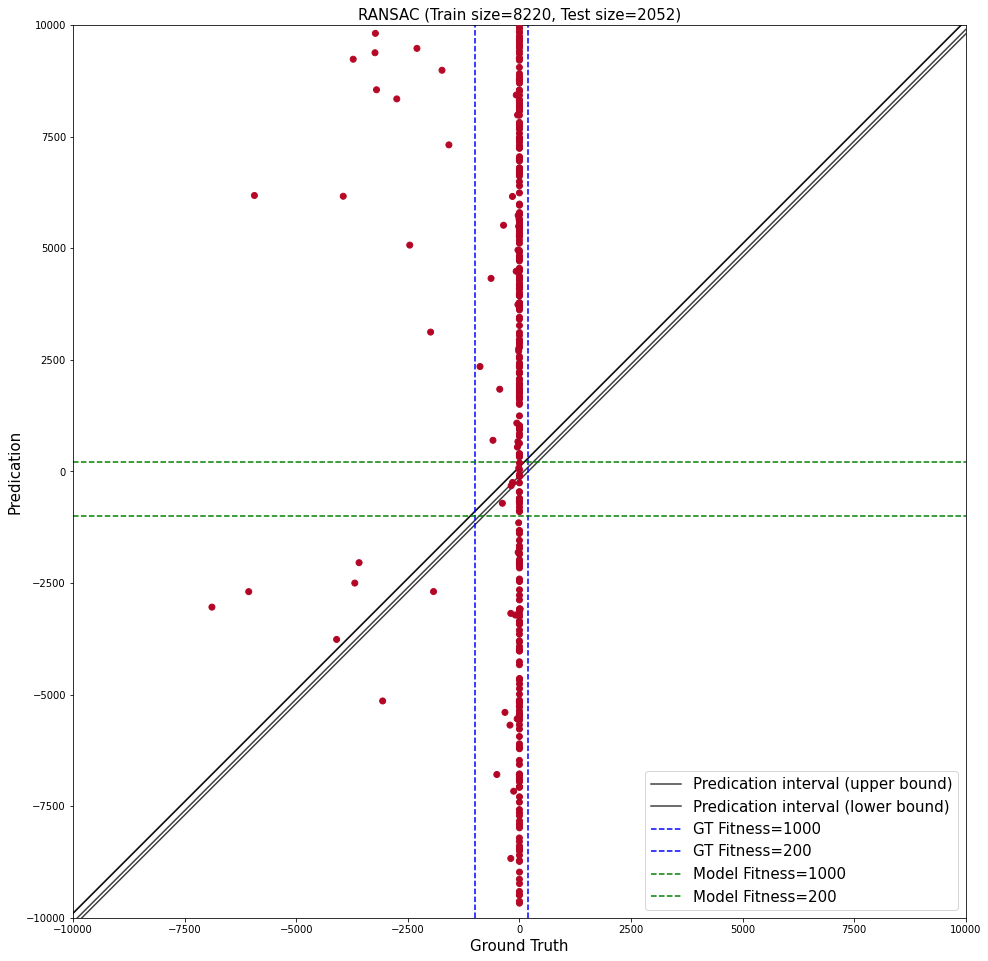

In [169]:
# Fitting RANSAC to the dataset
ran_reg = RANSACRegressor(random_state=0)
ran_reg.fit(X_train, y_train)
ran_reg.score(X_test, y_test)
y3_pred = ran_reg.predict(X_test)

y1_pred = lin_reg.predict(X_test)
fig1, ax1 = plt.subplots(figsize=(16, 20))
c1 = -abs(y_test - y3_pred)
ax1.scatter(y_test,y3_pred, c=c1,cmap=plt.cm.coolwarm, zorder=10)
lims1_plus = [
    np.min([ax1.get_xlim(), ax1.get_ylim()])+100,  # min of both axes
    np.max([ax1.get_xlim(), ax1.get_ylim()])+100,  # max of both axes
]
lims1_minus = [
    np.min([ax1.get_xlim(), ax1.get_ylim()])-100,  # min of both axes
    np.max([ax1.get_xlim(), ax1.get_ylim()])-100,  # max of both axes
]
lims1 = [
    np.min([ax1.get_xlim(), ax1.get_ylim()]),  # min of both axes
    np.max([ax1.get_xlim(), ax1.get_ylim()]),  # max of both axes
]

# now plot both limits against eachother
ax1.plot(lims1_plus, lims1, 'k-', alpha=0.75, zorder=0, label = 'Predication interval (upper bound)')
ax1.plot(lims1_minus, lims1, 'k-', alpha=0.75, zorder=0, label = 'Predication interval (lower bound)')
plt.axvline(x=-1000, color='b', linestyle='--', label='GT Fitness=1000')
plt.axvline(x=200, color='b', linestyle='--', label='GT Fitness=200')
plt.axhline(y=-1000, color='g', linestyle='--', label='Model Fitness=1000')
plt.axhline(y=200, color='g', linestyle='--', label='Model Fitness=200')
ax1.plot(lims1_plus, lims1_minus, 'k-', alpha=0.75, zorder=0)
ax1.plot(lims1_minus, lims, 'k-', alpha=0.75, zorder=0)
ax1.legend(fontsize=15)
ax1.set_title('RANSAC (Train size=8220, Test size=2052)', size=15)
ax1.set_aspect('equal')
ax1.set_xlabel('Ground Truth', size=15)
ax1.set_ylabel('Predication', size=15)
ax1.set_xlim([-10000,10000])
ax1.set_ylim([-10000,10000])
plt.savefig('RANSAC_pred.png', dpi=300)
files.download('RANSAC_pred.png')


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fcc52834450>]],
      dtype=object)

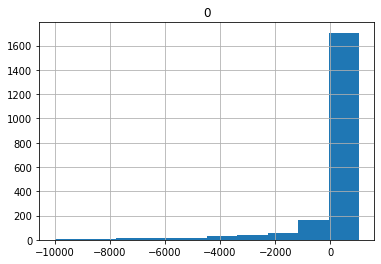

In [ ]:
ytest = y_test[0].to_numpy()
y_test.hist(bins = 10)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fcc5238df50>]],
      dtype=object)

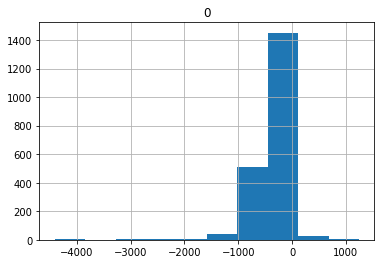

In [ ]:
y1pred = pd.DataFrame(data = y1_pred)
y1pred.hist(bins=10)

In [ ]:
 y_test_new = y_test.reset_index().drop(columns=['index'])
 ys = pd.concat([y_test_new, y1pred], axis=1)
 ys.columns = ["GT", "Pred"]
 ys['GT']
 


0        2.00331
1        1.33554
2        1.00165
3        3.67273
4        2.00331
          ...   
2050   -19.36529
2051     3.00496
2052     2.00331
2053     1.33554
2054     1.33554
Name: GT, Length: 2055, dtype: float64

In [ ]:
ys['GT'].hist(bins=14, alpha=0.5, legend=True, figsize=[12, 7])
ys['Pred'].hist(bins=14, alpha=0.5, legend=True)
plt.savefig('figure_1.png', dpi=300)
files.download('figure_1.png')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>